In [4]:
import csv
import math as m
import networkx as nx

import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Problem Instance

In [9]:
from pkg.read_problem import read_problem, extract_problem
xy_customers, xy_icps, xy_crcs, xy_pc, q = read_problem('./datasets/original')

In [10]:
I,J,C,B,K,V,W,DjUc,Dcj,Dc,FCV,FCT,FCR,U = extract_problem(xy_customers, xy_icps, xy_crcs, xy_pc, q)

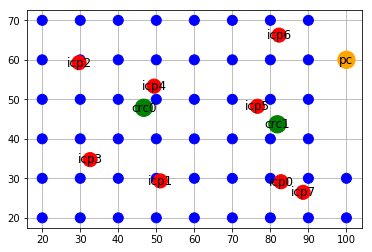

In [11]:
from pkg.lrp_nodes_graph import lrp_nodes_graph, lrp_draw_and_save
G, pos, labels, colors, size = lrp_nodes_graph(xy_customers, xy_icps, xy_crcs, xy_pc)

lrp_draw_and_save(G, pos, labels, colors, size, "test-problem.png")

# Routing Problem

## TSP

In [14]:
from pkg.tsp_cplex import tsp_cplex

In [15]:
prob, X = tsp_cplex(J+C,DjUc,
            relaxation=False,path="tsp_cplex.lp")

In [16]:
G2 = G.copy()

for j,xj in enumerate(X):
    for i,xij in enumerate(xj):
        if xij == 1:
            G2.add_edge(I+i,I+j)

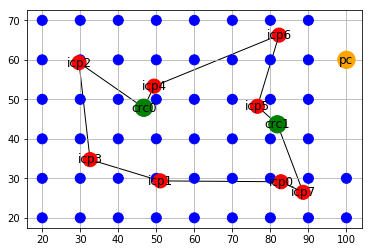

In [17]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True,node_size=size)
plt.show()

## VRP 2/T

In [18]:
from pkg.vrp_2_t_cplex import vrp_2_t_cplex

In [103]:
prob, X, N = vrp_2_t_cplex(J,C,B,
            c,FCR,
            relaxation=False,path="vrp_2_t_cplex.lp")

121 121 121


CplexSolverError: CPLEX Error  1217: No solution exists.

In [ ]:
Arcs = [(j,c,b) for c in range(C+J) for j in range(C+J) for b in range(B) if X[c][j][b] > 0.5]
Arcs

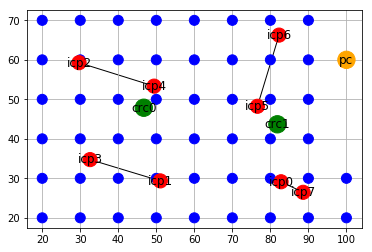

In [102]:
G2 = G.copy()

for a in Arcs:
    G2.add_edge(I+a[0],I+a[1])
    
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True,node_size=size)
plt.show()